This script is used to produce Figure S6 (model-satellite comparison for bloom start and end timing, 2005-2014) for the Payne et al. paper "End-of-century Arctic Ocean phytoplankton blooms start a month earlier due to anthropogenic climate change". 

1. Import Packages

In [1]:
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
from pathlib import Path

2. Read in daily Satellite Chl data (Lewis et al. algorithm) for 2005-2014. This step takes a lot of memory. Set 0 values to nans at the end.

In [4]:
fdir = "/glade/campaign/cesm/development/pcwg/Arc_Sat_Chl/"
sat_chl = np.zeros([10,365,2325,2014])
i = -1
for yr in np.arange(2005,2015):
    i = i + 1
    fnam = str(yr) + 'A.nc'
    ncfile1 = xr.open_dataset(fdir + fnam)
    sat_chl[i,:,:,:] =ncfile1["chl"][:,:,:]


In [ ]:
sat_chl = np.where(sat_chl==0, np.nan, sat_chl)

3. Calculate satellite-derived start and end date for each location and all years. Do this by identifying if the pixel has data, finding the maximum, and then rolling through the days until Chl is greater than 25% of the maximum, is at the maximum, or is less than 25% of the maximum following the peak for the first time. This step takes a long time, so I've written the data out as a .txt file (and then read that in) to avoide having to re-do it.

In [ ]:
satmax_25 = np.full([10,2325,2014],np.nan); 
satmax = np.full([10,2325,2014],np.nan);
satmax_25_2 = np.full([10,2325,2014],np.nan); 
chlmax =  np.full([2325,2014],np.nan); 
for yr in np.arange(0,10):
    print(yr)
    for i in np.arange(0,2325):
        for j in np.arange(0,2014):
            if np.nanmax(sat_chl[yr,:,i,j]) > 0:
                chlmax[i,j] = np.nanmax(sat_chl[yr,:,i,j])
                t0 = False; t1 = False; t2 = False
                for t in np.arange(0,365):
                    if sat_chl[yr,t,i,j] > 0.25 * chlmax[i,j] and t0 == False:
                        satmax_25[yr,i,j] = t + 1; t0 = True
                    if sat_chl[yr,t,i,j] == chlmax[i,j] and t1 == False:
                        satmax[yr,i,j] = t + 1; t1 = True
                    if sat_chl[yr,t,i,j] < 0.25 * chlmax[i,j] and t2 == False and t1 == True:
                        satmax_25_2[yr,i,j] = t + 1;
                        break

In [ ]:
for yr in np.arange(2005,2015):
    y = y + 1
    dir = open("/glade/u/home/cpayne/CESM2LE/ChlGC/" + str(yr) + "_satchlmax_25.txt", "w")
    for row in satmax_25[y,:,:]:
        np.savetxt(dir, row)
    dir.close()
    dir = open("/glade/u/home/cpayne/CESM2LE/ChlGC/" + str(yr) + "_satchlmax_25_2.txt", "w")
    for row in satmax_25_2[y,:,:]:
        np.savetxt(dir, row)
    dir.close()

In [2]:
satmax_25 = np.full([10,2325,2014],np.nan); satmax_25_2 = np.full([10,2325,2014],np.nan); 
y = -1
for yr in np.arange(2005,2015):
    y = y + 1
    dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/ChlGC/" + str(yr) + "_satchlmax_25.txt")
    satmax_25[y,:,:] = dir.reshape(2325,2014)
    dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/ChlGC/" + str(yr) + "_satchlmax_25_2.txt")
    satmax_25_2[y,:,:] = dir.reshape(2325,2014)

4. Plot mean (2005-2014) satellite-derived bloom start date (Fig S6C).

/glade/derecho/scratch/cpayne/tmp/ipykernel_33308/2379924819.py:12: RuntimeWarning: Mean of empty slice
  pc = ax.pcolormesh(ncfile1["lon"], ncfile1["lat"], np.nanmean(satmax_25,axis=0),


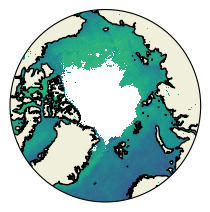

In [21]:
# make circular boundary for polar stereographic circular plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# set figure basics (size, projection)
fig = plt.figure(figsize=(2.5,2.5)) 
# fig = plt.figure(figsize=(6,6)) 
ax = plt.axes(projection=ccrs.NorthPolarStereo()); 
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 66.5, 90], crs = ccrs.PlateCarree());

# plot the data
pc = ax.pcolormesh(ncfile1["lon"], ncfile1["lat"], np.nanmean(satmax_25,axis=0),
                   vmin = 1, vmax = 365,
                   transform=ccrs.PlateCarree());

# add land and colorbar
ax.coastlines();  ax.add_feature(cfeature.LAND); #plt.colorbar(pc);

# print out figure
figdir = '/glade/u/home/cpayne/Projects/BloomLength/Figures/FigS1c.png';
# plt.savefig(figdir,facecolor='none', dpi = 600);
# plt.close()

5. Plot mean (2005-2014) satellite-derived bloom end date (Fig S6D).

/glade/derecho/scratch/cpayne/tmp/ipykernel_44818/3050503557.py:14: RuntimeWarning: Mean of empty slice
  pc = ax.pcolormesh(ncfile1["lon"], ncfile1["lat"], np.nanmean(satmax_25_2,axis=0),


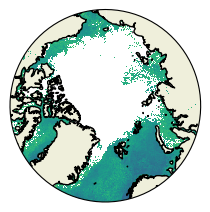

In [5]:
# make circular boundary for polar stereographic circular plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# set figure basics (size, projection)
fig = plt.figure(figsize=(2.5,2.5)) 
ax = plt.axes(projection=ccrs.NorthPolarStereo()); 
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 66.5, 90], crs = ccrs.PlateCarree());

# plot the data
pc = ax.pcolormesh(ncfile1["lon"], ncfile1["lat"], np.nanmean(satmax_25_2,axis=0),
                   vmin = 1, vmax = 365,
                   transform=ccrs.PlateCarree());

# add land and colorbar
ax.coastlines();  ax.add_feature(cfeature.LAND); #plt.colorbar(pc);

# write out figure
figdir = '/glade/u/home/cpayne/Projects/BloomLength/Figures/FigS6d.png';
# plt.savefig(figdir,facecolor='none', dpi = 600);
# plt.close()

6. Use a masked array to calculate the mean start and end dates north of the Arctic Circle.

In [22]:
import numpy.ma as ma
satmax_25_arc = np.full([2325,2014],np.nan); satmax_25_2_arc = np.full([2325,2014],np.nan); 
satmax_25_arc = ma.masked_array(np.nanmean(satmax_25,axis=0), ncfile1["lat"] < 66.5)
satmax_25_2_arc = ma.masked_array(np.nanmean(satmax_25_2,axis=0), ncfile1["lat"] < 66.5)

print(np.nanmean(satmax_25_arc),np.nanstd(satmax_25_arc),
      np.nanmean(satmax_25_2_arc),np.nanstd(satmax_25_2_arc))


/glade/derecho/scratch/cpayne/tmp/ipykernel_14026/2060652364.py:3: RuntimeWarning: Mean of empty slice
  satmax_25_arc = ma.masked_array(np.nanmean(satmax_25,axis=0), ncfile1["lat"] < 66.5)
/glade/derecho/scratch/cpayne/tmp/ipykernel_14026/2060652364.py:4: RuntimeWarning: Mean of empty slice
  satmax_25_2_arc = ma.masked_array(np.nanmean(satmax_25_2,axis=0), ncfile1["lat"] < 66.5)


7. Use an arbitrary data file to set the lat and lon variables.

In [7]:
vdir = 'ocn'
vnam = 'photoC_diat_zint_2'
fdir = '/glade/campaign/cgd/cesm/CESM2-LE/'+ vdir + '/proc/tseries/day_1/' + vnam + '/'
fnam = 'b.e21.BSSP370cmip6.f09_g17.LE2-1301.003.pop.h.ecosys.nday1.photoC_diat_zint_2.20450102-20550101.nc'

ncfile = xr.open_dataset(fdir + fnam)
lon = ncfile.TLONG.values
lat = ncfile.TLAT.values

# Interpolate lat and lon values over holes in the arrays
ok = ~np.isnan(lon)
xp = ok.ravel().nonzero()[0]
fp = lon[~np.isnan(lon)]
x  = np.isnan(lon).ravel().nonzero()[0]
lon[np.isnan(lon)] = np.interp(x, xp, fp)

ok = ~np.isnan(lat)
xp = ok.ravel().nonzero()[0]
fp = lat[~np.isnan(lat)]
x  = np.isnan(lat).ravel().nonzero()[0]
lat[np.isnan(lat)] = np.interp(x, xp, fp)


8. Here, I read in model Chl start and end timing (calculated using the BloomMetrics script) for 2005-2014 and set points to nan if there is no value.

In [2]:
chlmax_25_2 = np.zeros([10,384,320,50]); chlmax_25 = np.zeros([10,384,320,50]); 
yr = 2004
for yrset in np.arange(0,10):
    yr = yr + 1
    print(yr)
    dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/ChlGC/" + str(yr) + "chlmax_25.txt")
    chlmax_25[yrset,:,:,:] = dir.reshape(384,320,50)
    dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/ChlGC/" + str(yr) + "chlmax_25_2.txt")
    chlmax_25_2[yrset,:,:,:] = dir.reshape(384,320,50)

chlmax_25 = np.where(chlmax_25==0, np.nan, chlmax_25)
chlmax_25_2 = np.where(chlmax_25_2==0, np.nan, chlmax_25_2)


2005
2006
2007
2008
2009
2010
2011
2012
2013
2014


In [4]:
chlmax_25_2 = np.zeros([384,320,50]); chlmax_25 = np.zeros([384,320,50]); 
yr = 2010
dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/ChlGC/" + str(yr) + "chlmax_25.txt")
chlmax_25[:,:,:] = dir.reshape(384,320,50)
dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/ChlGC/" + str(yr) + "chlmax_25_2.txt")
chlmax_25_2[:,:,:] = dir.reshape(384,320,50)

chlmax_25 = np.where(chlmax_25==0, np.nan, chlmax_25)
chlmax_25_2 = np.where(chlmax_25_2==0, np.nan, chlmax_25_2)


In [5]:
max_25 = np.zeros([384,320,50]); max_25_2 = np.zeros([384,320,50]); 
yrnum = str(2010)
dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/AnnualGC/" + yrnum + "_max_25.txt")
max_25[:,:,:] = dir.reshape(384,320,50)
dir = np.loadtxt("/glade/u/home/cpayne/Projects/BloomLength/AnnualGC/" + yrnum + "_max_25_2.txt")
max_25_2[:,:,:] = dir.reshape(384,320,50)


In [13]:
cmax_arc = np.zeros([50]); chlmax_arc = np.zeros([50]); cmax_2_arc = np.zeros([50]);
chlmax_2_arc = np.zeros([50]);
for ens in np.arange(0,50):
    cmax_arc[ens] = np.nansum(max_25[:,:,ens] * arc_ocn) / np.nansum(arc_ocn)
    cmax_2_arc[ens] = np.nansum(max_25_2[:,:,ens] * arc_ocn)/ np.nansum(arc_ocn)
    chlmax_arc[ens] = np.nansum(chlmax_25[:,:,ens] * arc_ocn)/ np.nansum(arc_ocn)
    chlmax_2_arc[ens] = np.nansum(chlmax_25_2[:,:,ens] * arc_ocn)/ np.nansum(arc_ocn)

In [14]:
print(np.nanmean(cmax_arc),np.nanstd(cmax_arc))
print(np.nanmean(chlmax_arc),np.nanstd(chlmax_arc))
print(np.nanmean(cmax_2_arc),np.nanstd(cmax_2_arc))
print(np.nanmean(chlmax_2_arc),np.nanstd(chlmax_2_arc))


157.92362147544597 2.15548551710279
163.25248397245164 2.419933010238265
225.0346716375503 2.4904585303078957
202.46240793804435 4.653511521409995


9. I use masked arrays (areacello_ocn and arc_ocn) to get rid of data south of 50°N or 66.5°N, which allows me to then calculate mean start and end timings as a comparison.

In [8]:
acdir = '/glade/collections/cmip/CMIP6/CMIP/NCAR/CESM2/historical/r1i1p1f1/Ofx/areacello/gn/files/d20190308/areacello_Ofx_CESM2_historical_r1i1p1f1_gn.nc'
acfil = xr.open_dataset(acdir)
areacello = acfil['areacello'].values # tarea <- ocean files
areacello_ocn = np.full([384,320], np.nan)
for i in np.arange(0,384):
    for j in np.arange(0,320):
        if np.isnan(ncfile['photoC_diat_zint_2'][180,i,j]) == False and ncfile["TLAT"][i,j] > 50:
            areacello_ocn[i,j] = areacello[i,j]


/glade/u/apps/opt/conda/envs/npl-2024b/lib/python3.11/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


In [9]:
arc_ocn = ma.masked_array(areacello_ocn, lat < 66.5)

In [11]:
print(np.nansum(chlmax_25*arc_ocn)/np.nansum(arc_ocn),
     np.nanstd(chlmax_25*arc_ocn)/np.nanstd(arc_ocn),
     np.nansum(chlmax_25_2*arc_ocn)/np.nansum(arc_ocn),
     np.nanstd(chlmax_25_2*arc_ocn)/np.nanstd(arc_ocn),)

ValueError: operands could not be broadcast together with shapes (384,320,50) (384,320) 

10. Plot modeled bloom start time, based on Chl data (2005-2014) - Fig S6A.

/glade/derecho/scratch/cpayne/tmp/ipykernel_33308/2419592413.py:11: RuntimeWarning: Mean of empty slice
  pc = ax.pcolormesh(lon,lat, np.nanmean(chlmax_25[:,:,:,0],axis=0),


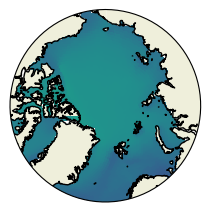

In [33]:
# make circular boundary for polar stereographic circular plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# set figure basics (size, projection)
fig = plt.figure(figsize=(2.5,2.5)) 
ax = plt.axes(projection=ccrs.NorthPolarStereo()); 
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 66.5, 90], crs = ccrs.PlateCarree());

# plot the data
pc = ax.pcolormesh(lon,lat, np.nanmean(chlmax_25[:,:,:,0],axis=0), 
                   vmin = 1, vmax = 365,
                   transform=ccrs.PlateCarree());

# add land and colorbar
ax.coastlines();  ax.add_feature(cfeature.LAND); #plt.colorbar(pc, orientation='horizontal', extend='both');

# write out figure
figdir = '/glade/u/home/cpayne/Projects/BloomLength/Figures/FigS6a.png';
plt.savefig(figdir,facecolor='none', dpi = 600);
# plt.close()


11. Plot modeled bloom end time, based on Chl data (2005-2014) - Fig S6B.

/glade/derecho/scratch/cpayne/tmp/ipykernel_33308/2466194597.py:12: RuntimeWarning: Mean of empty slice
  pc = ax.pcolormesh(lon,lat, np.nanmean(chlmax_25_2[:,:,:,0],axis=0),


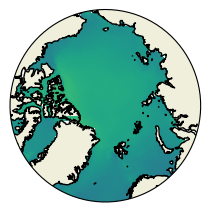

In [32]:
# make circular boundary for polar stereographic circular plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# set figure basics (size, projection)
fig = plt.figure(figsize=(2.5,2.5)) 
# fig = plt.figure(figsize=(6,6)) 
ax = plt.axes(projection=ccrs.NorthPolarStereo()); 
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 66.5, 90], crs = ccrs.PlateCarree());

# plot the data
pc = ax.pcolormesh(lon,lat, np.nanmean(chlmax_25_2[:,:,:,0],axis=0), 
                   vmin = 1, vmax = 365,
                   transform=ccrs.PlateCarree());

# add land and colorbar
ax.coastlines();  ax.add_feature(cfeature.LAND); #plt.colorbar(pc, orientation='horizontal', extend='both');

# write out figure
figdir = '/glade/u/home/cpayne/Projects/BloomLength/Figures/FigS6b.png';
plt.savefig(figdir,facecolor='none', dpi = 600);
# plt.close()


/glade/derecho/scratch/cpayne/tmp/ipykernel_33308/2292178211.py:11: RuntimeWarning: Mean of empty slice
  pc = ax.pcolormesh(lon,lat, np.nanmean(chlmax_25_2[:,:,:,0],axis=0),


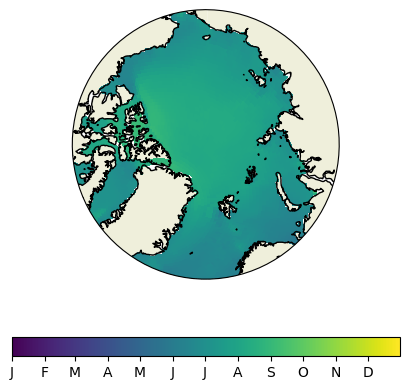

In [26]:
# make circular boundary for polar stereographic circular plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

fig = plt.figure(figsize=(5,5)) 
ax = plt.axes(projection=ccrs.NorthPolarStereo()); 
ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 66.5, 90], crs = ccrs.PlateCarree());
pc = ax.pcolormesh(lon,lat, np.nanmean(chlmax_25_2[:,:,:,0],axis=0), 
                   vmin = 1, vmax = 365,
                   transform=ccrs.PlateCarree());
ax.coastlines();  ax.add_feature(cfeature.LAND); cbar = plt.colorbar(pc, orientation='horizontal');
cbar.set_ticks([1,32,60,91,121,152,182,213,244,274,305,335])
cbar.set_ticklabels(['J','F','M','A','M','J','J','A','S','O','N','D'])

figdir = '/glade/u/home/cpayne/Projects/BloomLength/Figures/FigS6cbar.png';
plt.savefig(figdir,facecolor='none', dpi = 600);
# plt.close()